# NYPD Motor Vehicle Collision Data<a id='Top'></a>

### Overview

The "Motor Vehicle Collisions - Crashes" dataset available through New York City's Open Data program contains information about reported vehicle crashes in NYC. Each row contains details on a single crash event. 

The data contains records from 2012 to today, with data updated on a daily basis. At the time of this writing, there are 1.59 million rows, each row representing a crash event, and 29 columns. 

In this notebook we will analyze this data as follows:

1. [Importing](#Importing)
2. [Understanding](#Understanding)
    - [Column Contents](#column_contents)
    - [Descriptive Statistics](#descriptive_statistics)
    - [Columns Missing Data](#empty)
3. [Transforming](#Transforming)
    - [Dropping Columns](#Drop)
    - [Renaming Data](#Renaming)
    - [Redundant Columns](#Redundant)
    - [Data Types](#data_type)
    - [Categorizing](#categorizing)
4. [Analyzing](#Analyzing)
5. [Statistical Analysis](#statistical_analysis)
6. [Visualizing](#Visualizations)
    - [Number of Deaths by Borough](#Fataities_by_borough) 
    - [Crash Fatalities by Borough](#crash_fatalities_by_borough)
    - [Number of Deaths by Hour](#Fataities_by_hour)
    - [Number of Accidents by Season](#accidents_by_season)
    - [Fatal Car Crash Locations](#car_crash_locations)
    - [Contributing Factor Trends](#contributing_factor_trends)
    - [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
    - [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
    - [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
    - [Crash Factor Percentages in Queens](#queens_crash_causes)
7. [End of Document](#Bottom)


* The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

### Importing the Data<a id='Importing'></a>

Let's begin by importing a few libraries we will use later in the notebook, and then bring the first two million rows of NYPD Motor Vehicle Collision Data using pandas. We are over-estimating the number of rows, to leave room for more data if this is run in the future.

In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [38]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=2000000", low_memory=False)

And let's pull up the data dictionary supplied by the Open Data website for reference.

In [39]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info',  header=1)
data_dict.head()

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN


### Understanding the Data <a id='Understanding'></a>
Let's look the first few rows of the dataset. 

In [40]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 200) # This returns 200 rows at max to prevent accidents when writing code
datanyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.676052,-73.790184,POINT (-73.790184 40.676052),NaN,NaN,150-08 123 AVENUE,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4184637,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.657780,-73.951096,POINT (-73.951096 40.65778),NaN,NaN,288 HAWTHORNE STREET,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4195773,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.718143,-73.993835,POINT (-73.993835 40.718143),CHRYSTIE STREET,GRAND STREET,NaN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4202457,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460,40.840534,-73.866610,POINT (-73.86661 40.840534),NaN,NaN,1837 EAST TREMONT AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4198749,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016,40.745440,-73.975400,POINT (-73.9754 40.74544),EAST 35 STREET,2 AVENUE,NaN,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,4183798,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN


... And get overall information about the contents of the data. <a id='column_contents'></a>

In [41]:
pd.options.display.max_info_rows = 5000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 29 columns):
crash_date                       1612178 non-null object
crash_time                       1612178 non-null object
borough                          1122973 non-null object
zip_code                         1122776 non-null object
latitude                         1415291 non-null float64
longitude                        1415291 non-null float64
location                         1415291 non-null object
on_street_name                   1296029 non-null object
off_street_name                  1071560 non-null object
cross_street_name                223984 non-null object
number_of_persons_injured        1612161 non-null float64
number_of_persons_killed         1612147 non-null float64
number_of_pedestrians_injured    1612178 non-null int64
number_of_pedestrians_killed     1612178 non-null int64
number_of_cyclist_injured        1612178 non-null int64
number_of_cyclist_killed        

Each column should therotically contain approxamitely 1.6 million values. There are some columns with considerably fewer entries. Let's find the percentage of the missing values and see which columns have the most amount of missing values. We will get a mean of missing values and then round it to 4 decimal place.

In [42]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.34
zip_code                         30.36
latitude                         12.21
longitude                        12.21
location                         12.21
on_street_name                   19.61
off_street_name                  33.53
cross_street_name                86.11
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.45
contributing_factor_vehicle_3    93.53
contributing_factor_vehicle_4    98.65
contributing_factor_vehicle_5    99.66
collision_id                      0.00
vehicle_type_code1                0.34
vehicle_type_code2       

Wow! Some columns have a lot of missing values. 

For some it makes sense. `contributing_factor_vehicle_2` or `contributing_factor_vehicle_3` may be missing simply because there were no second or third vehicle or factors contributing to the collision.  Other than those, for example `borough` column has 30% of its values missing. 

It looks like `contributing_factor_vehicle_3`, `contributing_factor_vehicle_4`, `contributing_factor_vehicle_5` and `vehicle_type_code_3`, `vehicle_type_code_4`, `vehicle_type_code_5` have very few values compared to the others. We will take a closer look at them when we start transforming our data.

For now, we will use the `describe` function to generate some descriptive statistics. This will work on numeric and object series, and may point out any glaring holes in the data. <a id='descriptive_statistics'></a>

In [43]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.415291e+06,1.415291e+06,1.612161e+06,1.612147e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06,1.612178e+06
mean,4.069244e+01,-7.387329e+01,2.626512e-01,1.165526e-03,5.057134e-02,6.302034e-04,2.077376e-02,8.435793e-05,1.914491e-01,4.534239e-04,2.780128e+06
std,1.135063e+00,2.338367e+00,6.598699e-01,3.608148e-02,2.317045e-01,2.568229e-02,1.437913e-01,9.251563e-03,6.222332e-01,2.315893e-02,1.505349e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066881e+01,-7.397720e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.030495e+06
50%,4.072257e+01,-7.392979e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.442214e+06
75%,4.076797e+01,-7.386692e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.845489e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.249104e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns? The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of the empty `latitude` columns using the `isnull` function. <a id='empty'></a>

In [44]:
datanyc[datanyc['latitude'].isnull()].head(20)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
25,2019-08-09T00:00:00.000,8:50,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4186776,Sedan,Sedan,NaN,NaN,NaN
27,2019-08-02T00:00:00.000,13:56,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,BRUCKNER BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4182323,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
36,2019-08-14T00:00:00.000,17:15,MANHATTAN,10001,NaN,NaN,NaN,WEST 34 STREET,12 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4189031,Sedan,Sedan,NaN,NaN,NaN
38,2019-08-07T00:00:00.000,16:13,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,NaN,NaN,NaN,NaN,4185359,Pick-up Truck,NaN,NaN,NaN,NaN
45,2019-08-02T00:00:00.000,0:15,NaN,NaN,NaN,NaN,NaN,VANWYCK EXPRESSWAY,109 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4181243,Sedan,Sedan,NaN,NaN,NaN
47,2019-08-15T00:00:00.000,18:08,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,NaN,4192999,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
48,2019-08-28T00:00:00.000,12:30,NaN,NaN,NaN,NaN,NaN,LAURELTON PARKWAY,FRANCIS LEWIS BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,NaN,NaN,NaN,NaN,4196752,Sedan,NaN,NaN,NaN,NaN
54,2018-07-22T00:00:00.000,17:06,BRONX,10467,NaN,NaN,NaN,Van Cortlandt Park S,MOSHOLU PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Control Disregarded,Unspecified,NaN,NaN,NaN,3945953,Sedan,Sedan,NaN,NaN,NaN
75,2019-08-21T00:00:00.000,20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 HARPER STREET,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4192896,Box Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
78,2019-08-24T00:00:00.000,9:20,NaN,NaN,NaN,NaN,NaN,SOUNDVIEW LANE,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Brakes Defective,NaN,NaN,NaN,NaN,4194569,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we *really* had some time, we would write/find a program to reverse map the `on_street_name` to the other fields.

For now, we'll pivot to take a closer look at vehicle types.

In [45]:
datanyc['vehicle_type_code1'].value_counts().head(20)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  158560
Station Wagon/Sport Utility Vehicle    128533
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16441
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10644
LIVERY VEHICLE                          10481
Box Truck                                8331
Bus                                      6862
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4000
Name: vehicle_type_code1, dtype: int64

In [46]:
datanyc['vehicle_type_code_3'].value_counts().head(20)

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10737
Station Wagon/Sport Utility Vehicle     8897
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     687
Pick-up Truck                            602
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                198
Bus                                      125
Motorcycle                               101
Name: vehicle_type_code_3, dtype: int64

We believe we have a decent understanding of our data. In the next section we will modify the column names to standardize the dataset, deal with missing values, clean duplications, and generally get our dataset to the point where we use it confidently

## Transforming the Data
 <a id='Transforming'></a>
### What needs attention
####  [Dropping Columns](#Drop)
* Some columns (such as `vehicle_type_code_4`, `contributing_factor_vehicle_5`) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. `collision_id`, `on_street_name`, `off_street_name`, `cross_street_name`) so we can drop them completely. 


#### [Renaming Data](#Renaming)
* Cleaning and combining duplicated rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### [Redundant Columns](#Redundant)
* `Latitude` and `longitude` columns seem to be contained in the `location` column. We like keeping the two values separate for now, so we can probably remove `location` later.

#### [Data Types](#data_type)
* The values that we expect to be 'datetime' type are object (`crash_date` and `crash_time` columns). We'll fix those.
* We will change the data type of zip code to string.

#### [Categorizing](#categorizing)
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).

## Dropping Columns  <a id='Drop'></a>
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [47]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [48]:
clean_nyc.drop(columns=["collision_id", "on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what 'clean_nyc' looks like now, as far as data types and number of columns (and values in those columns):

In [49]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 19 columns):
crash_date                       1612178 non-null object
crash_time                       1612178 non-null object
borough                          1122973 non-null object
zip_code                         1122776 non-null object
latitude                         1415291 non-null float64
longitude                        1415291 non-null float64
location                         1415291 non-null object
number_of_persons_injured        1612161 non-null float64
number_of_persons_killed         1612147 non-null float64
number_of_pedestrians_injured    1612178 non-null int64
number_of_pedestrians_killed     1612178 non-null int64
number_of_cyclist_injured        1612178 non-null int64
number_of_cyclist_killed         1612178 non-null int64
number_of_motorist_injured       1612178 non-null int64
number_of_motorist_killed        1612178 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [50]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.34
zip_code                         30.36
latitude                         12.21
longitude                        12.21
location                         12.21
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.45
vehicle_type_code1                0.34
vehicle_type_code2               16.51
dtype: float64

So far, so good.

## Correcting Misspellings and Renaming  <a id='Renaming'></a>

We will modify the column names to standardize the dataset using the rename function.

In [51]:
clean_nyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at `vehicle_type_code_1`.

In [52]:
clean_nyc['vehicle_type_code_1'].value_counts().head(40)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  158560
Station Wagon/Sport Utility Vehicle    128533
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16441
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10644
LIVERY VEHICLE                          10481
Box Truck                                8331
Bus                                      6862
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4000
Tractor Truck Diesel                     3635
Van                               

It looks like there are misspellings and duplicates. Let's see if we can combine some of the obvious misspellings.

In [53]:
clean_nyc['vehicle_type_code_1'].replace('SPORT UTILITY / STATION WAGON', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('TAXI', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Bike', 'BICYCLE', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorscooter', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Moped', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('MOTORCYCLE', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBULANCE', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Refrigerated Van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorbike', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBUL', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CAB', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Cab', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Taxi', 'taxy', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('taxy', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AM', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CONV', 'Convertible', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Garbage or Refuse', 'Dump', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('OTHER', 'UNKNOWN', inplace=True)
clean_nyc['vehicle_type_code_1'].value_counts().head(50)

PASSENGER VEHICLE                 715236
SUV                               442039
Sedan                             158560
taxi                               67112
UNKNOWN                            43911
Pick-up Truck                      33713
Van                                30402
Bus                                20919
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
LIVERY VEHICLE                     10481
BICYCLE                             9568
Motorcycle                          8690
Box Truck                           8334
Ambulance                           4029
Tractor Truck Diesel                3635
TK                                  2485
BU                                  2229
Dump                                1992
Convertible                         1767
FIRE TRUCK                          1061
DS                                  1006
4 dr sedan                           891
PK                                   848
Flat Bed        

Now let's look at `contributing_factor_vehicle_1`.

In [54]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Passing Too Closely', 'Driver Inattention/Distraction',
       'Unspecified', 'Unsafe Speed', 'Reaction to Uninvolved Vehicle',
       'Following Too Closely', 'Passing or Lane Usage Improper',
       'View Obstructed/Limited', 'Unsafe Lane Changing',
       'Aggressive Driving/Road Rage', 'Other Vehicular',
       'Driverless/Runaway Vehicle', 'Turning Improperly',
       'Failure to Yield Right-of-Way', 'Backing Unsafely',
       'Brakes Defective', 'Drugs (illegal)', 'Pavement Defective',
       'Traffic Control Disregarded', 'Lane Marking Improper/Inadequate',
       'Tire Failure/Inadequate', 'Failure to Keep Right',
       'Obstruction/Debris', 'Outside Car Distraction',
       'Alcohol Involvement', 'Driver Inexperience', 'Pavement Slippery',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Using On Board Navigation Device', nan, 'Lost Consciousness',
       'Passenger Distraction', 'Oversized Vehicle', 'Fatigued/Drowsy',
       'Illnes', 'Fell Asl

A lot of unique values... Let's do some combining to make our job easy.

In [55]:
clean_nyc['contributing_factor_vehicle_1'].replace({'Backing Unsafely': 'Driver Inexperience', 
                                                  'Unsafe Speed': 'Driver Inexperience', 
                                                 'Passing or Lane Usage Improper': 'Driver Inexperience',
                                                 'Turning Improperly': 'Driver Inexperience',
                                                 'Following Too Closely': 'Driver Inexperience',
                                                 'Passing Too Closely' : 'Driver Inexperience',
                                                 'Outside Car Distraction': 'Driver Inexperience',
                                                 'Steering Failure': 'Driver Inexperience',
                                                 'Reaction to Uninvolved Vehicle': 'Driver Inexperience',
                                                 'Traffic Control Disregarded': 'Driver Inexperience',
                                                 'Failure to Yield Right-of-Way': 'Driver Inexperience',
                                                 'Aggressive Driving/Road Rage': 'Driver Inexperience',
                                                 'Unsafe Lane Changing': 'Driver Inexperience',
                                                  
                                                 'Passenger Distraction': 'Driver Inattention/Distraction',
                                                 'Failure to Keep Right': 'Driver Inattention/Distraction',
                                                 'Eating or Drinking': 'Driver Inattention/Distraction',
                                                 'Animals Action': 'Driver Inattention/Distraction',
                                                 'Using On Board Navigation Device': 'Driver Inattention/Distraction',
                                                 'Reaction to Other Uninvolved Vehicle': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hands-free)': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-Held)': 'Driver Inattention/Distraction',
                                                 'Other Electronic Device': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-held)': 'Driver Inattention/Distraction',
                                                 'Texting': 'Driver Inattention/Distraction',
                                                 'Listening/Using Headphones': 'Driver Inattention/Distraction',
                                                 'Fatigued/Drowsy': 'Driver Inattention/Distraction',
                                                 'Fell Asleep': 'Driver Inattention/Distraction',
                                                  
                                                  
                                                 'Brakes Defective': 'Car Defects',
                                                 'Tinted Windows': 'Car Defects',
                                                 'Tire Failure/Inadequate': 'Car Defects',
                                                 'Tow Hitch Defective': 'Car Defects',
                                                 'Headlights Defective': 'Car Defects',
                                                 'Accelerator Defective': 'Car Defects',
                                                 'Windshield Inadequate': 'Car Defects',
                                                 'Driverless/Runaway Vehicle': 'Car Defects',
                                                 'Oversized Vehicle': 'Car Defects',

                                                  
                                                 'Traffic Control Disregarded':'Road Defects',
                                                 'Glare':'Road Defects',
                                                 'Tinted Windows':'Road Defects',
                                                 'Lane Marking Improper/Inadequate': 'Road Defects',
                                                 'View Obstructed/Limited': 'Road Defects',
                                                 'Pavement Defective': 'Road Defects',
                                                 'Other Lighting Defects': 'Road Defects',
                                                 'Obstruction/Debris': 'Road Defects',
                                                 'Traffic Control Device Improper/Non-Working': 'Road Defects',
                                                 'Shoulders Defective/Improper': 'Road Defects',
                                                 'Pavement Slippery': 'Road Defects',
                                                  
                                                 'Illnes': 'Illness',
                                                 'Lost Consciousness': 'Illness',
                                                 'Physical Disability': 'Illness',
                                                 'Prescription Medication': 'Illness',
                                                  
                                                 'Drugs (illegal)': 'Drugs (Illegal)',
                                                 'Alcohol Involvement': 'Drugs (Illegal)',
                                                  
                                                 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Outside Error',
                                                 'Vehicle Vandalism': 'Outside Error',
                                                 'Other Vehicular': 'Outside Error',
                                                  
                                                 }, inplace=True)

In [56]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Driver Inexperience', 'Driver Inattention/Distraction',
       'Unspecified', 'Road Defects', 'Outside Error', 'Car Defects',
       'Drugs (Illegal)', nan, 'Illness', '80', '1'], dtype=object)

I will also drop 80 and 1 since I do not know what they are about. I will also drop the nan value, which will make it easier to make visualizations later on.

In [57]:
nyc80 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '80' ].index
clean_nyc.drop(nyc80, inplace=True)

nyc1 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '1' ].index
clean_nyc.drop(nyc1, inplace=True)

clean_nyc.dropna(subset = ['contributing_factor_vehicle_1'], how='all', inplace=True)

clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Driver Inexperience', 'Driver Inattention/Distraction',
       'Unspecified', 'Road Defects', 'Outside Error', 'Car Defects',
       'Drugs (Illegal)', 'Illness'], dtype=object)

Even in one column you can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined list, to get better data fidelity, and we hope by this point, you can see why.

Next, we will rename some of the columns to make things easier while analyzing the data.

In [58]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.676052,-73.790184,POINT (-73.790184 40.676052),0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unspecified,Sedan,Pick-up Truck
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.657780,-73.951096,POINT (-73.951096 40.65778),0.0,0.0,0,0,0,0,0,0,Driver Inexperience,Unspecified,SUV,Station Wagon/Sport Utility Vehicle
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.718143,-73.993835,POINT (-73.993835 40.718143),1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,Sedan,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460,40.840534,-73.866610,POINT (-73.86661 40.840534),0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,taxi,Station Wagon/Sport Utility Vehicle
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016,40.745440,-73.975400,POINT (-73.9754 40.74544),1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,SUV,Bike


Next, we want to change all our values to lower case letters because having all the values in the same format will make it easier to read and also it can be useful while making analysis (e.g. we can just type the value without thinking whether that value was lower case or upper case).

In [59]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05t00:00:00.000,16:30,queens,11434,40.676052,-73.790184,point (-73.790184 40.676052),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck
1,2019-08-27t00:00:00.000,16:02,brooklyn,11225,40.657780,-73.951096,point (-73.951096 40.65778),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle
2,2019-08-15t00:00:00.000,17:57,manhattan,10002,40.718143,-73.993835,point (-73.993835 40.718143),1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN
3,2019-08-30t00:00:00.000,21:53,bronx,10460,40.840534,-73.866610,point (-73.86661 40.840534),0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle
4,2019-08-06t00:00:00.000,9:45,manhattan,10016,40.745440,-73.975400,point (-73.9754 40.74544),1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike


We can see that `persons_injured` and `persons_killed` column values are float. Let's change them to integer, just like the values in other columns related to number of persons injured and killed. m

In [60]:
clean_nyc['persons_injured'] = clean_nyc.persons_injured.astype('Int32')
clean_nyc['persons_killed'] = clean_nyc.persons_killed.astype('Int32')
clean_nyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434,40.676052,-73.790184,POINT (-73.790184 40.676052),0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,Sedan,Pick-up Truck
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225,40.657780,-73.951096,POINT (-73.951096 40.65778),0,0,0,0,0,0,0,0,Driver Inexperience,Unspecified,SUV,Station Wagon/Sport Utility Vehicle
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002,40.718143,-73.993835,POINT (-73.993835 40.718143),1,0,0,0,0,0,1,0,Driver Inattention/Distraction,NaN,Sedan,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460,40.840534,-73.866610,POINT (-73.86661 40.840534),0,0,0,0,0,0,0,0,Unspecified,Unspecified,taxi,Station Wagon/Sport Utility Vehicle
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016,40.745440,-73.975400,POINT (-73.9754 40.74544),1,0,0,0,1,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,SUV,Bike


Now we want to do something with the missing values. Let's see what values we have in the `contributing_factor_vehicle_1` and `contributing_factor_vehicle_2` columns.

In [61]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                       591796
driver inexperience               449568
driver inattention/distraction    366408
road defects                       60520
outside error                      56838
illness                            47226
car defects                        19265
drugs (illegal)                    16189
Name: contributing_factor_vehicle_1, dtype: int64

We can combine the missing and unspecified values.

In [62]:
clean_nyc1['contributing_factor_vehicle_1'].replace('NaN', 'unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                       591796
driver inexperience               449568
driver inattention/distraction    366408
road defects                       60520
outside error                      56838
illness                            47226
car defects                        19265
drugs (illegal)                    16189
Name: contributing_factor_vehicle_1, dtype: int64

Let's see the values for the `contributing_factor_vehicle_2` column.

In [63]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts(dropna=False)

unspecified                                              1172578
NaN                                                       212519
driver inattention/distraction                             73664
other vehicular                                            26845
failure to yield right-of-way                              14026
following too closely                                      13625
fatigued/drowsy                                            10825
passing or lane usage improper                              9466
turning improperly                                          7741
backing unsafely                                            7035
passing too closely                                         6644
driver inexperience                                         5483
traffic control disregarded                                 5308
unsafe lane changing                                        5293
lost consciousness                                          5223
pavement slippery        

We can do the same for this column as well.

In [64]:
clean_nyc1['contributing_factor_vehicle_1'].replace('NaN', 'unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                       591796
driver inexperience               449568
driver inattention/distraction    366408
road defects                       60520
outside error                      56838
illness                            47226
car defects                        19265
drugs (illegal)                    16189
Name: contributing_factor_vehicle_1, dtype: int64

Let's check out data one more time...

In [65]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05t00:00:00.000,16:30,queens,11434,40.676052,-73.790184,point (-73.790184 40.676052),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck
1,2019-08-27t00:00:00.000,16:02,brooklyn,11225,40.657780,-73.951096,point (-73.951096 40.65778),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle
2,2019-08-15t00:00:00.000,17:57,manhattan,10002,40.718143,-73.993835,point (-73.993835 40.718143),1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN
3,2019-08-30t00:00:00.000,21:53,bronx,10460,40.840534,-73.866610,point (-73.86661 40.840534),0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle
4,2019-08-06t00:00:00.000,9:45,manhattan,10016,40.745440,-73.975400,point (-73.9754 40.74544),1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike


## Redundant Coumns: 'latitude' and 'longitude' <a id='Redundant'></a>

We suspect the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's check the data dictionary to see whether we can gain some information about it.

In [66]:
data_dict

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN
5,MV-Collisions - Crash,LATITUDE,Latitude coordinate for Global Coordinate Syst...,NaN,NaN
6,MV-Collisions - Crash,LONGITUDE,Longitude coordinate for Global Coordinate Sys...,NaN,NaN
7,MV-Collisions - Crash,LOCATION,"Latitude , Longitude pair",NaN,NaN
8,MV-Collisions - Crash,ON STREET NAME,Street on which the collision occurred,NaN,NaN
9,MV-Collisions - Crash,CROSS STREET NAME,Nearest cross street to the collision,NaN,NaN


When we look at the `LOCATION` column (row 7) we see that it is described as "Latitude , Longitude pair". We are probably right but let's verify it even further.

In [67]:
clean_nyc1[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
0,40.676052,-73.790184,point (-73.790184 40.676052)
1,40.657780,-73.951096,point (-73.951096 40.65778)
2,40.718143,-73.993835,point (-73.993835 40.718143)
3,40.840534,-73.866610,point (-73.86661 40.840534)
4,40.745440,-73.975400,point (-73.9754 40.74544)
5,40.726524,-73.946390,point (-73.94639 40.726524)
6,40.667522,-73.780630,point (-73.78063 40.667522)
7,40.858210,-73.916790,point (-73.91679 40.85821)
8,40.666492,-73.765360,point (-73.76536 40.666492)
9,40.837720,-73.927630,point (-73.92763 40.83772)


Before we quickly do something we might regret, let's first see if it's true that all the `location` data follows the same pattern we see right now:

In [68]:
clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

False    1607810
Name: location, dtype: int64

1607810 rows where that's not the case! More than we expected! Let's check them out!

In [69]:
clean_nyc1[~clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05t00:00:00.000,16:30,queens,11434,40.676052,-73.790184,point (-73.790184 40.676052),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck
1,2019-08-27t00:00:00.000,16:02,brooklyn,11225,40.657780,-73.951096,point (-73.951096 40.65778),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle
2,2019-08-15t00:00:00.000,17:57,manhattan,10002,40.718143,-73.993835,point (-73.993835 40.718143),1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN
3,2019-08-30t00:00:00.000,21:53,bronx,10460,40.840534,-73.866610,point (-73.86661 40.840534),0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle
4,2019-08-06t00:00:00.000,9:45,manhattan,10016,40.745440,-73.975400,point (-73.9754 40.74544),1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike
5,2019-08-29t00:00:00.000,12:28,brooklyn,11222,40.726524,-73.946390,point (-73.94639 40.726524),1.0,0.0,0,0,1,0,0,0,unspecified,unspecified,suv,bike
6,2019-08-31t00:00:00.000,2:16,queens,11434,40.667522,-73.780630,point (-73.78063 40.667522),0.0,0.0,0,0,0,0,0,0,unspecified,NaN,sedan,NaN
7,2019-08-11t00:00:00.000,22:23,NaN,NaN,40.858210,-73.916790,point (-73.91679 40.85821),0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,station wagon/sport utility vehicle
8,2019-08-02t00:00:00.000,16:30,queens,11434,40.666492,-73.765360,point (-73.76536 40.666492),0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,pick-up truck,pick-up truck
9,2019-08-21t00:00:00.000,17:30,bronx,10452,40.837720,-73.927630,point (-73.92763 40.83772),0.0,0.0,0,0,0,0,0,0,unspecified,NaN,sedan,NaN


Ahh those sweet missing values... As we've seen before, `latitude`, `longitude` and `location` columns have 12% of their values missing each. Let's drop the `location` column.

In [70]:
clean_nyc1.drop(columns="location", inplace = True)

And let's peek at our data.

In [71]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05t00:00:00.000,16:30,queens,11434,40.676052,-73.790184,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck
1,2019-08-27t00:00:00.000,16:02,brooklyn,11225,40.657780,-73.951096,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle
2,2019-08-15t00:00:00.000,17:57,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN
3,2019-08-30t00:00:00.000,21:53,bronx,10460,40.840534,-73.866610,0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle
4,2019-08-06t00:00:00.000,9:45,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike


## Data Type <a id='data_type'></a>

Let's look at our dates to make sure they are all in the same format:

In [73]:
clean_nyc1[['crash_date', 'crash_time']].head()

,crash_date,crash_time
0,2019-08-05t00:00:00.000,16:30
1,2019-08-27t00:00:00.000,16:02
2,2019-08-15t00:00:00.000,17:57
3,2019-08-30t00:00:00.000,21:53
4,2019-08-06t00:00:00.000,9:45


The `crash_date` column definitely needs some fixing... We will transform the string timestamp for `crash_date` to a true datetime data type.

In [74]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc['crash_date'])
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-08-05,16:30,queens,11434,40.676052,-73.790184,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck
1,2019-08-27,16:02,brooklyn,11225,40.657780,-73.951096,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle
2,2019-08-15,17:57,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN
3,2019-08-30,21:53,bronx,10460,40.840534,-73.866610,0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle
4,2019-08-06,9:45,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called `hour` in which we will only have the hours instead of hours and minutes.

In [76]:
clean_nyc1['crash_time'] = pd.to_datetime(clean_nyc.crash_time)
clean_nyc1['hour'] = clean_nyc1['crash_time'].dt.hour
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour
0,2019-08-05,2019-12-02 16:30:00,queens,11434,40.676052,-73.790184,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck,16
1,2019-08-27,2019-12-02 16:02:00,brooklyn,11225,40.657780,-73.951096,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle,16
2,2019-08-15,2019-12-02 17:57:00,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN,17
3,2019-08-30,2019-12-02 21:53:00,bronx,10460,40.840534,-73.866610,0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle,21
4,2019-08-06,2019-12-02 09:45:00,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike,9


We'll also clean up the `zip_code` column here, which should have string values, not integer.

In [77]:
clean_nyc1.loc[:,'zip_code'] = clean_nyc1['zip_code'].astype(str)

## Categorizing<a id='categorizing'></a>: Making a Seasons Variable

We are interested in adding a variable that shows the season in which a collision occurred.

In [78]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1.crash_date)
clean_nyc1['crash_date'].dt.month.head(30)

0      8
1      8
2      8
3      8
4      8
5      8
6      8
7      8
8      8
9      8
10     8
11     8
12     8
13     8
14     8
15     8
16     8
17     8
18     8
19     8
20     8
21     8
22     8
23     8
24    11
25     8
26     8
27     8
28     8
29     8
Name: crash_date, dtype: int64

In [79]:
def season(crash_date):
    if crash_date.month in ([3, 4, 5]):
        val = 'Spring'
    elif crash_date.month in ([6, 7, 8]):
        val = 'Summer'
    elif crash_date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif crash_date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['crash_date'].apply(season)

In [80]:
clean_nyc1['season'].value_counts()

Autumn    437218
Summer    430940
Spring    382946
Winter    356706
Name: season, dtype: int64

Before we move on the the analysis of our dataset, we would like to take a quick look at the difference our work has made so far.

In [81]:
datanyc.shape

(1612178, 29)

In [82]:
clean_nyc1.shape

(1607810, 20)

We've reduced our data by 9 columns. Let's take a general look at our data as well as the 'info'.

In [83]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2019-08-05,2019-12-02 16:30:00,queens,11434,40.676052,-73.790184,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,sedan,pick-up truck,16,Summer
1,2019-08-27,2019-12-02 16:02:00,brooklyn,11225,40.657780,-73.951096,0.0,0.0,0,0,0,0,0,0,driver inexperience,unspecified,suv,station wagon/sport utility vehicle,16,Summer
2,2019-08-15,2019-12-02 17:57:00,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN,17,Summer
3,2019-08-30,2019-12-02 21:53:00,bronx,10460,40.840534,-73.866610,0.0,0.0,0,0,0,0,0,0,unspecified,unspecified,taxi,station wagon/sport utility vehicle,21,Summer
4,2019-08-06,2019-12-02 09:45:00,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike,9,Summer


In [84]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607810 entries, 0 to 1612177
Data columns (total 20 columns):
crash_date                       1607810 non-null datetime64[ns]
crash_time                       1607810 non-null datetime64[ns]
borough                          1119642 non-null object
zip_code                         1607810 non-null object
latitude                         1411426 non-null float64
longitude                        1411426 non-null float64
persons_injured                  1607796 non-null float64
persons_killed                   1607785 non-null float64
pedestrians_injured              1607810 non-null int64
pedestrians_killed               1607810 non-null int64
cyclist_injured                  1607810 non-null int64
cyclist_killed                   1607810 non-null int64
motorist_injured                 1607810 non-null int64
motorist_killed                  1607810 non-null int64
contributing_factor_vehicle_1    1607810 non-null object
contributing_facto

We've done a lot of data cleaning, and this is a great start for our next stage. If you would like to perform your own analyses, you can use the following cell's code to save the cleaned data locally by removing the `#` mark at the begining of the line.

In [85]:
#clean_nyc1.to_csv("clean_nyc1_data.csv", index = False)

# Analyzing the data <a id='Analyzing'></a>

Let's see, for example, how many persons, cyclist, pedestrian and motorist killed in 2000000 collisions.

In [86]:
personskillednum = clean_nyc1['persons_killed'] > 0
personskillednum.sum()

1796

In [87]:
cyclistkillednum = clean_nyc1['cyclist_killed'] > 0
cyclistkillednum.sum()

135

In [88]:
motoristkillednum = clean_nyc1['motorist_killed'] > 0
motoristkillednum.sum()

678

In [89]:
pedestrianskillednum = clean_nyc1['pedestrians_killed'] > 0
pedestrianskillednum.sum()

991

It looks like being a pedestrian is not very safe in NYC. What about injured people? 

In [90]:
personsinjurednum = clean_nyc1['persons_injured'] > 0
personsinjurednum.sum()

308277

In [91]:
cyclistinjurednum = clean_nyc1['cyclist_injured'] > 0
cyclistinjurednum.sum()

33215

In [92]:
motoristinjurednum = clean_nyc1['motorist_injured'] > 0
motoristinjurednum.sum()

200635

In [93]:
pedestriansinjurednum = clean_nyc1['pedestrians_injured'] > 0
pedestriansinjurednum.sum()

76160

Interestingly, as far as injuries go, being a motorist is worse than being a pedestrian. So maybe we can say that there are many motorcycle collisions that result in injuries but not death?  

As a sidenote: the number of 'cyclists', 'motorists', and 'pedestrians' does not add up to the number of 'persons'. We cannot identify any part of our code which would cause this error, and suspect data integrity issues in the original data source.

Let's see which boroughs have a high number of collisions.

In [94]:
clean_nyc1['borough'].value_counts()

brooklyn         347750
queens           298611
manhattan        268652
bronx            156121
staten island     48508
Name: borough, dtype: int64

A lot of collisions in Brooklyn! 

Let's see the common reasons behind collisions.

In [95]:
clean_nyc1.contributing_factor_vehicle_1.value_counts().head(30)

unspecified                       591796
driver inexperience               449568
driver inattention/distraction    366408
road defects                       60520
outside error                      56838
illness                            47226
car defects                        19265
drugs (illegal)                    16189
Name: contributing_factor_vehicle_1, dtype: int64

Driver inattention/distraction and following too closely are the main causes of collisions. 

What about the vehicle types? We will first make a copy of data -- a whole new data frame named `contributing_factor` to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [96]:
contributing_factor_inattention = clean_nyc1[clean_nyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor_inattention.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
2,2019-08-15,2019-12-02 17:57:00,manhattan,10002,40.718143,-73.993835,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,NaN,sedan,NaN,17,Summer
4,2019-08-06,2019-12-02 09:45:00,manhattan,10016,40.745440,-73.975400,1.0,0.0,0,0,1,0,0,0,driver inattention/distraction,driver inattention/distraction,suv,bike,9,Summer
11,2019-08-17,2019-12-02 14:02:00,brooklyn,11226,40.644047,-73.957470,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,station wagon/sport utility vehicle,14,Summer
15,2019-08-09,2019-12-02 18:30:00,manhattan,10012,40.720890,-73.995760,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,driver inattention/distraction,sedan,sedan,18,Summer
21,2019-08-15,2019-12-02 16:11:00,manhattan,10018,40.756207,-73.991360,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,bus,station wagon/sport utility vehicle,16,Summer


Now we can see which vehicles have the 'Driver Inattention' factor most frequently.

In [97]:
contributing_factor_inattention['vehicle_type_code_1'].value_counts().head(30)

passenger vehicle                 152110
suv                               107803
sedan                              41805
taxi                               18123
pick-up truck                       8004
van                                 6498
unknown                             6436
bus                                 4205
small com veh(4 tires)              2920
large com veh(6 or more tires)      2801
livery vehicle                      2714
bicycle                             2497
box truck                           2135
motorcycle                          1451
tractor truck diesel                 753
ambulance                            675
tk                                   601
dump                                 492
convertible                          474
bu                                   474
4 dr sedan                           221
ds                                   207
flat bed                             200
pk                                   151
scooter         

'Passenger vehicles' take the lead in terms of vehicles most commonly involved in 'driver inattention/distraction' caused collisions. They are followed by 'sport utilities/station wagons'. 

# Statistical Analysis <a id='statistical_analysis'></a>

## ANOVA

We will begin by looking at whether there is a difference between the number of deaths by borough for persons, pedestrians, motorists and cyclists. We will use one way ANOVA test for that since we have more than two boroughs (more than two nominal variables).

We will first drop the NaN's in the `persons_killed` column to be able to do the ANOVA test.

In [98]:
from scipy import stats

clean_nyc1.dropna(subset = ['persons_killed'], how='all', inplace=True)

stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([5.69083361]), pvalue=array([0.0001412]))

Our p-value is less than 0.05, which means that it is statistically significant. There seems to be a difference between the number of persons killed by borough.

In [99]:
stats.f_oneway(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([14.33808882]), pvalue=array([1.04423853e-11]))

That is a very low p-value. We are seeing a difference. Our null hypothesis was that all the boroughs have the same mean for the number of motorists killed in accidents. That null hypothesis is highly unlikely and one or more of these boroughs is different than the others.

In [100]:
stats.f_oneway(clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([1.38537649]), pvalue=array([0.23610585]))

Our p-value more than 0.05, which means that it is not statistically significant. There seems to be no difference in the mean number of cyclists killed by borough.

In [101]:
stats.f_oneway(clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([0.37431171]), pvalue=array([0.82712899]))

Our p-value is not less than 0.05. There seems to be no difference in the number of pedestrians killed by borough.

So, there is a difference in the numbers of persons and motorists killed, but there is no difference in the numbers of pedestrians and cyclists  killed by borough.

Let's also see whether there is a difference in the numbers of persons killed by season.

In [102]:
clean_nyc1.season.unique()

array(['Summer', 'Autumn', 'Spring', 'Winter'], dtype=object)

In [103]:
stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['season']=="Autumn"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Spring"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Summer"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Winter"])

F_onewayResult(statistic=array([3.61320955]), pvalue=array([0.01262563]))

The p-value is statistically significant (less than 0.05). This may suggest what we are seeing here in our sample data can be a real difference. We can reject the null hypothesis.

ANOVA can tell there is a difference but can't tell which borough (or boroughs) is different. We need to do some comparisons to see which borough (or boroughs) is the outlier. Let's try two-sample T-tests.

## Two-Sample T-Tests

We will begin by using two-sample T-test to measure whether numbers of motorists killed has a mean that differs between Manhattan and Staten Island. The two-sample T-test assumes that the distribution of values in each group follows a normal distribution ("bell curve"). Let's confirm that this is true for numbers of motorists killed in Manhattan and Staten Island.

In [104]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-8.1676554]), pvalue=array([3.15578386e-16]))

The statistic here represents the distance between the two means, in terms of standard deviations. That is a very small p-value and it is statistically significant. There is a difference between Manhattan and Staten Island. What about Brooklyn and Staten Island?

In [105]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'brooklyn'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-3.07986341]), pvalue=array([0.0020711]))

Our p-value is less than 0.05, so there is a statistically significant difference. We can reject the null hypothesis (which is that the motorists killed means are equal in each borough).

What about Queens and Manhattan?

In [106]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'queens'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'])

Ttest_indResult(statistic=array([6.29006083]), pvalue=array([3.17571546e-10]))

Our p-value is very small this time! There is a little difference... but what about the effect size? Are they really that different? Let's define cohen's d to measure the effect size. Let's look at the effect size for the difference between Manhattan and Queens.

In [107]:
from numpy import var, mean
from math import sqrt
def cohens_d (first, second):
  s1, s2 = var(first, ddof=1), var(second, ddof=1)
  std = sqrt(((len(first) - 1) * s1 + (len(second) - 1) * s2) / (len(first) + len(second) - 2))
  return (mean(first)-  mean(second)) / std

In [108]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"])

motorist_killed   -0.016726
dtype: float64

It looks like the difference is trivial. It is a very small effect size which indicates that the difference between them is not very large.

What about the effect size for Manhattan and Staten Island?

In [109]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"])

motorist_killed   -0.040294
dtype: float64

Again, the difference is trivial. It is a very small effect size which indicates that the difference between them is not statistically significant.

Next, let's see if there are statistically significant differences between the number of fatalities of different vehicle types.

In [110]:
stats.ttest_ind(clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([3.55837865]), pvalue=array([0.00037318]))

It looks like SUV's are more lethal, though not enough to outlaw them. The small p-value is low enough to show that the slight difference is in fact statistically significant, and not a trick of our dataset.

We wonder though: Are SUVs even more dangerous for pedestrians? They are bigger...

In [111]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([4.86924985]), pvalue=array([1.12051118e-06]))

Wow!! It looks like the differences is greater, but the p-value is so small that there is almost no chance that the difference is random!

Let's see if SUVs are significantly different to the largest/broadest set of fatal vehicle types: "passenger vehicle"

In [112]:
stats.ttest_ind(clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([3.1155035]), pvalue=array([0.00183636]))

SUVs are slightly, but significatly more fatal to all people in NYC. Now to check for pedestrians.

In [113]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([5.5249011]), pvalue=array([3.29742023e-08]))

This is even worse than comparing SUVs to Sedans! 

So far, we were able to determine that some vehicles are more dangerous to the lives of New Yorkers than others. We were able to point out the raw numbers, but also prove that they had statistical significance. We also found that strong evidence of how dangerous SUVs are to pedestrians in NYC.

## Chi-Square

Chi-square, or chi-squared, is a measure of independence of categorical variables. Here we will be looking at categories like borough and season. Chi-square requires frequency counts or a contingency table.

In [114]:
contingency_table = pd.crosstab(
    clean_nyc1['borough'], clean_nyc1['season'],
    margins = True)

contingency_table

season,Autumn,Spring,Summer,Winter,All
borough,,,,,
bronx,41004,37901,41899,35313,156117
brooklyn,92999,83565,92849,78332,347745
manhattan,73461,64264,72036,58886,268647
queens,81188,70535,79116,67768,298607
staten island,12988,11239,12413,11867,48507
All,301640,267504,298313,252166,1119623


In [115]:
stats.chi2_contingency(contingency_table)

(244.86866813131746,
 1.2350113440085778e-40,
 20,
 array([[  42059.81109713,   37299.98577021,   41595.90381852,
           35161.29931414,  156117.        ],
        [  93686.7157963 ,   83084.37615162,   92653.3790258 ,
           78320.52902629,  347745.        ],
        [  72376.75635459,   64186.02251651,   71578.46213502,
           60505.75899388,  268647.        ],
        [  80448.34330842,   71344.16399806,   79561.02187165,
           67253.47082187,  298607.        ],
        [  13068.37344356,   11589.45156361,   12924.23314902,
           10924.94184382,   48507.        ],
        [ 301640.        ,  267504.        ,  298313.        ,
          252166.        , 1119623.        ]]))

Our chi-square value is 244.9 and p-value is, well, very small. It is statistically significant. That suggests that the variable season is somehow related to the variable borough. Season did influence the number of accidents in each borough.

In [116]:
# clean_nyc1.to_csv("clean_nyc2_data.csv", index = False)

Now, we can begin our visualizations...

## Visualizing the data <a id='Visualizations'></a>

We will create an exploratory visualization of:

* [Number of Deaths by Borough](#Fataities_by_borough)
* [Crash Fatalities by Borough](#crash_fatalities_by_borough)
* [Number of Deaths by Hour](#Fataities_by_hour)
* [Number of Accidents by Season](#accidents_by_season)
* [Fatal Car Crash Locations](#car_crash_locations)
* [Contributing Factor Trends](#contributing_factor_trends)
* [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
* [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
* [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
* [Crash Factor Percentages in Queens](#queens_crash_causes)

## Number of deaths by borough <a id='Fataities_by_borough'></a>

Let's see the average of killed persons by borough with the collisions count.

In [117]:
clean_nyc1.groupby('borough').persons_killed.agg(['count', 'mean'])

,count,mean
borough,,
bronx,156117,0.001012
brooklyn,347745,0.001142
manhattan,268647,0.000823
queens,298607,0.001202
staten island,48507,0.001340


Let's graph this with a bar chart.

Text(0.5, 0, ' ')

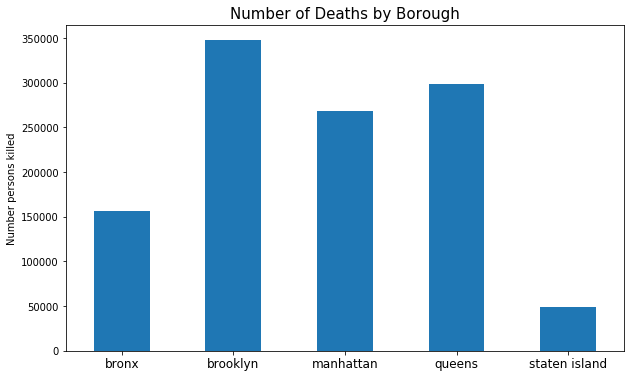

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.count().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number persons killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

It looks like Staten Island and Queens have the highest probability of death, meanwhile Manhattan has the lowest, which may be due to its smaller size.

## Crash fatalities by borough <a id='crash_fatalities_by_borough'></a>

In order to build a visualization from the dataframe, we will need to manipulate the data. We will pull a few columns into a new dataframe, grouping crashes by borough and month, along with the sum of persons killed.

Before we start slicing data to examine it, we will quickly change the `crash_date` column into a datetime object, making the date easier to work with later.

In [121]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1['crash_date'])
clean_nyc1.tail()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
1612173,2012-07-21,2019-12-02 22:46:00,brooklyn,11226,40.651741,-73.965241,0.0,0.0,0,0,0,0,0,0,road defects,unspecified,suv,unknown,22,Summer
1612174,2012-07-09,2019-12-02 16:45:00,NaN,nan,NaN,NaN,5.0,0.0,0,0,0,0,5,0,driver inattention/distraction,fatigued/drowsy,passenger vehicle,livery vehicle,16,Summer
1612175,2012-07-09,2019-12-02 14:35:00,NaN,nan,40.791492,-73.935763,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,passenger vehicle,passenger vehicle,14,Summer
1612176,2012-07-18,2019-12-02 09:20:00,manhattan,10024,40.779479,-73.973573,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,van,9,Summer
1612177,2012-07-12,2019-12-02 03:10:00,queens,11361,40.762501,-73.782522,0.0,0.0,0,0,0,0,0,0,unspecified,NaN,passenger vehicle,NaN,3,Summer


In [122]:
crashes_by_month = clean_nyc1.groupby(['borough', pd.Grouper(key='crash_date', freq='M')]).persons_killed.sum().copy()
crashes_by_month.head()

borough  crash_date
bronx    2012-07-31    4.0
         2012-08-31    6.0
         2012-09-30    2.0
         2012-10-31    3.0
         2012-11-30    0.0
Name: persons_killed, dtype: float64

This looks nice and grouped to us, but computers will have a hard time manipulating this data without an index. We will set one now with the 'reset_index' function.

In [123]:
crashes_by_month = crashes_by_month.reset_index()
crashes_by_month.tail()

,borough,crash_date,persons_killed
440,staten island,2019-07-31,1.0
441,staten island,2019-08-31,0.0
442,staten island,2019-09-30,0.0
443,staten island,2019-10-31,0.0
444,staten island,2019-11-30,0.0


Finally, we can get to the good stuff and look at this data visually.

In [ ]:
import plotly.express as px
fig = px.scatter(crashes_by_month,x ='crash_date',y ='persons_killed', color='borough', opacity=0.9)
fig

# Edit the layout
fig.update_layout(title='Crash Fatalities by Borough',
                  xaxis_title='Month',
                  yaxis_title='Number of People Killed'
                 )

# please use google colab to see the visualization.

While this information is useful analytically, it does not give a good sense of the dangers to nyc residents and visitors. We will attempt to show that in the next visualization.

## Number of deaths by hour  <a id='Fataities_by_hour'></a>

Let's see the mean of persons killed by hour. We are interested in seeing the percentage rate of persons killed for each hour. We want to see this information hourly to get a better general idea. 

Text(0.5, 0, 'time')

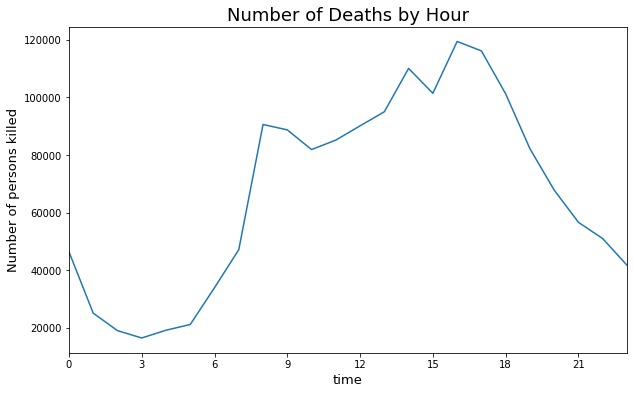

In [125]:
clean_nyc1.groupby(clean_nyc1.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Deaths by Hour', fontsize=18)
plt.ylabel('Number of persons killed', fontsize=13)
plt.xticks(np.arange(0, 24, step=3))
plt.xlabel('time', fontsize=13)

It looks like number of deaths goes up between 14:00 and 17:00. It decreases between 2:00 and 7:00, during when most people sleep.

## Number of accidents by season <a id='accidents_by_season'></a>

Let's see the number of accidents by season.

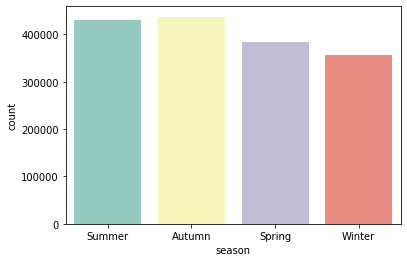

In [126]:
import seaborn as sns
ax = sns.countplot(x='season', data=clean_nyc1, palette='Set3')

Autumn and Summer have higher number of accidents compared to Spring and Winter.

## Fatal Car Crash Locations <a id='car_crash_locations'></a>

We will have to prepare a new dataframe with the latitude and longitutde values, before this can work. We'll also include other columns we may want to display in the visualiztion in some way, shape, or form.

In [127]:
crash_locations = clean_nyc1[['borough', 'crash_date', 'latitude' ,'longitude','persons_killed',
                           'cyclist_killed', 'pedestrians_killed','motorist_killed']].copy()
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,queens,2019-08-05,40.676052,-73.790184,0.0,0,0,0
1,brooklyn,2019-08-27,40.657780,-73.951096,0.0,0,0,0
2,manhattan,2019-08-15,40.718143,-73.993835,0.0,0,0,0
3,bronx,2019-08-30,40.840534,-73.866610,0.0,0,0,0
4,manhattan,2019-08-06,40.745440,-73.975400,0.0,0,0,0


The first thing we will do is remove any non-fatal rows. To do so, we must change the 0.0 to a 0 in the `persons_killed` column. The problem is that these values are currently not classified as integers.

In [128]:
crash_locations.dropna(subset = ['persons_killed'], how='all', inplace=True)
crash_locations['persons_killed'] = crash_locations.persons_killed.astype(int)
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,queens,2019-08-05,40.676052,-73.790184,0,0,0,0
1,brooklyn,2019-08-27,40.657780,-73.951096,0,0,0,0
2,manhattan,2019-08-15,40.718143,-73.993835,0,0,0,0
3,bronx,2019-08-30,40.840534,-73.866610,0,0,0,0
4,manhattan,2019-08-06,40.745440,-73.975400,0,0,0,0


Much better. Now to drop the rows.

In [129]:
crash_locations = crash_locations[crash_locations.persons_killed != 0].reset_index()
crash_locations.head()

,index,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,7,NaN,2019-08-11,40.858210,-73.91679,1,0,0,1
1,469,queens,2019-08-02,40.725918,-73.89535,1,0,1,0
2,543,brooklyn,2019-08-24,40.644814,-73.90483,1,0,0,1
3,713,brooklyn,2019-08-11,40.619984,-73.96427,1,1,0,0
4,920,NaN,2019-08-29,40.834890,-73.86630,1,0,1,0


Let's take a look to see if we can clean up this dataframe anymore.

In [130]:
crash_locations.shape

(1796, 9)

In [131]:
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,1.796000e+03,1548.000000,1548.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,8.505169e+05,40.693665,-73.865718,1.040089,0.075724,0.559577,0.403118
std,4.758496e+05,1.038307,1.880794,0.286282,0.266726,0.522809,0.560612
min,7.000000e+00,0.000000,-74.247475,1.000000,0.000000,0.000000,0.000000
25%,4.479278e+05,40.659649,-73.965721,1.000000,0.000000,0.000000,0.000000
50%,8.922750e+05,40.717198,-73.917506,1.000000,0.000000,1.000000,0.000000
75%,1.279068e+06,40.771818,-73.855362,1.000000,0.000000,1.000000,1.000000
max,1.611810e+06,40.912468,0.000000,8.000000,2.000000,6.000000,5.000000


It looks like we have 1796 rows, and we have missing lat/long values. For our purposes, we will drop those values now. There may be other ways to recover the data, or an approximation thereof, but it is beyond the scope of this notebook.

In [132]:
crash_locations.dropna(subset = ['latitude'], how='all', inplace=True)
crash_locations.dropna(subset = ['longitude'], how='all', inplace=True)
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,8.320477e+05,40.693665,-73.865718,1.041990,0.076873,0.569121,0.395349
std,4.826071e+05,1.038307,1.880794,0.301119,0.268891,0.523281,0.565118
min,7.000000e+00,0.000000,-74.247475,1.000000,0.000000,0.000000,0.000000
25%,4.069528e+05,40.659649,-73.965721,1.000000,0.000000,0.000000,0.000000
50%,8.582220e+05,40.717198,-73.917506,1.000000,0.000000,1.000000,0.000000
75%,1.265542e+06,40.771818,-73.855362,1.000000,0.000000,1.000000,1.000000
max,1.611810e+06,40.912468,0.000000,8.000000,2.000000,6.000000,5.000000


And finally, we can map these values.

In [ ]:
fig = px.scatter_mapbox(crash_locations, lat='latitude', lon='longitude',
                        size = "persons_killed",
                        hover_name="persons_killed",
                        hover_data=["pedestrians_killed", "cyclist_killed", "motorist_killed"],
                        color="persons_killed",
                        range_color=[1,8],
                        opacity=0.5,
                        width =850,
                        zoom=9,
                       )
fig.update_layout(title='Fatal Car Crash Locations')
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=286)
fig

# please use google colab to see the visualization.

This looks pretty scary! These deaths represent pedestrians, cyclists, and motorists. It is hard to find roads where people have not been killed by cars in NYC!

Though we must remember that this map represents deaths over nearly a decade.

## Contributing factor trends <a id='contributing_factor_trends'></a>

We will use Plotly, specifically, `plotly.express` to visualize some contributing factor trends.

In [134]:
clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['driver inexperience', 'driver inattention/distraction',
       'unspecified', 'road defects', 'outside error', 'car defects',
       'drugs (illegal)', 'illness'], dtype=object)

Let's drop the 'unspecified' value since it carries np information.

In [135]:
unspecifieddrop = clean_nyc1[clean_nyc1['contributing_factor_vehicle_1'] == 'unspecified' ].index
clean_nyc1.drop(unspecifieddrop, inplace=True)

clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['driver inexperience', 'driver inattention/distraction',
       'road defects', 'outside error', 'car defects', 'drugs (illegal)',
       'illness'], dtype=object)

In [ ]:
import plotly.graph_objects as go
fig = px.box(clean_nyc1, x="persons_killed", y="contributing_factor_vehicle_1")
fig.show()

# please use google colab to see the visualization.

Most collisions that result in one or two persons' death are due to road defects, meanwhile most collisions that result with no  death are due to an outside error.

Let's see when the accidents, in which more than one person die, tend to occur.

In [ ]:
fig = px.scatter (clean_nyc1, x= 'persons_killed', y= 'hour')
fig.show()

# please use google colab to see the visualization.

The collisions that result with more than one persons death tend to occur between 22:00 and 04:00.

## Contributing factors to crash fatalities <a id='Factor_Bar_Plot'></a>

We will use the 'value_counts' function to see how frequently contributing factor values appear in the data.

In [138]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

driver inexperience               449565
driver inattention/distraction    366402
road defects                       60520
outside error                      56837
illness                            47225
car defects                        19264
drugs (illegal)                    16189
Name: contributing_factor_vehicle_1, dtype: int64

In [139]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts()

unspecified                                              703830
driver inattention/distraction                            73664
other vehicular                                           26844
failure to yield right-of-way                             14026
following too closely                                     13625
fatigued/drowsy                                           10825
passing or lane usage improper                             9466
turning improperly                                         7741
backing unsafely                                           7035
passing too closely                                        6644
driver inexperience                                        5483
traffic control disregarded                                5308
unsafe lane changing                                       5293
lost consciousness                                         5223
pavement slippery                                          3477
prescription medication                 

For now, we'll just analyze the first contributing factor to get a general sense of the data, as `contributing_factor_vehicle_2` is relatively unpopulated.

Next we'll look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [140]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
2,driver inexperience,450.0
1,driver inattention/distraction,288.0
6,road defects,201.0
4,illness,96.0
5,outside error,73.0


Finally, let's drop 0's if we have any.

In [141]:
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
6,road defects,201.0
4,illness,96.0
5,outside error,73.0
3,drugs (illegal),71.0
0,car defects,6.0


Yes, let's remove those zero values now.

In [142]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
6,road defects,201.0
4,illness,96.0
5,outside error,73.0
3,drugs (illegal),71.0
0,car defects,6.0


Great. Now let's Visualize Fatal Car Crash Causes in NYC.

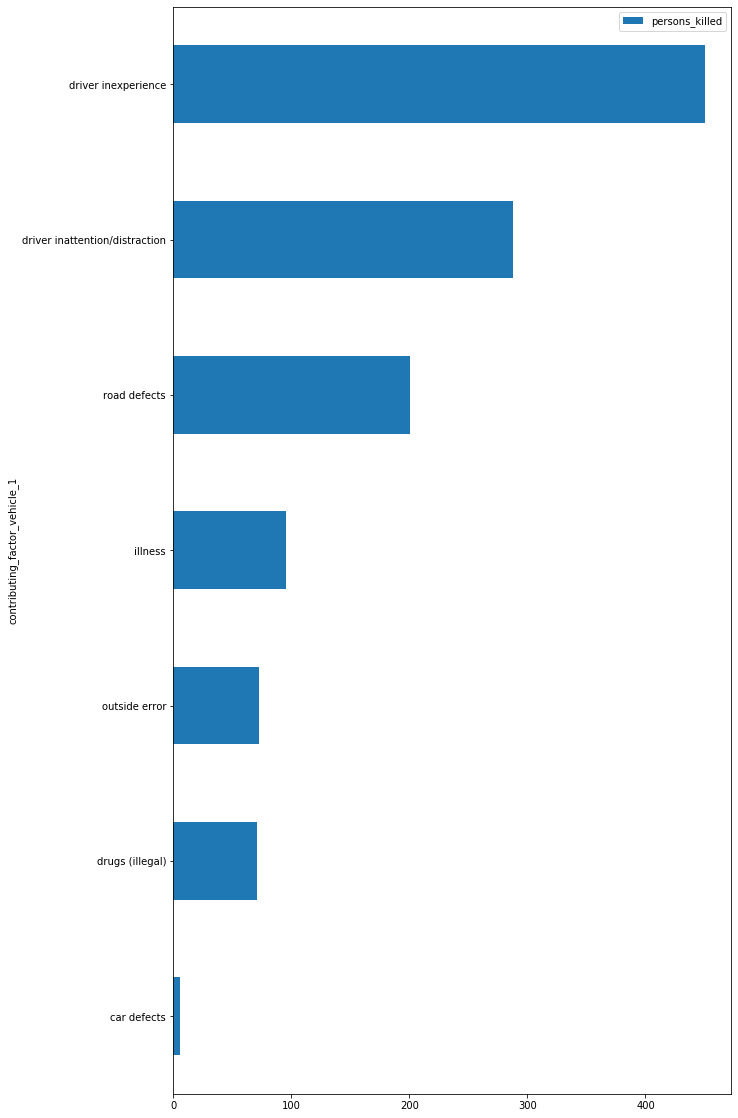

In [143]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by driver's bad behaviours, or are unrecorded.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist <a id='Fataity_Grouped_Series'></a>

For this we'll use Seaborn to compare the distributions of fatalities by the category of persons killed. We'll group each category from our original dataframe into it's own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [144]:
killed_motorists = clean_nyc1.groupby('crash_date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('crash_date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('crash_date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

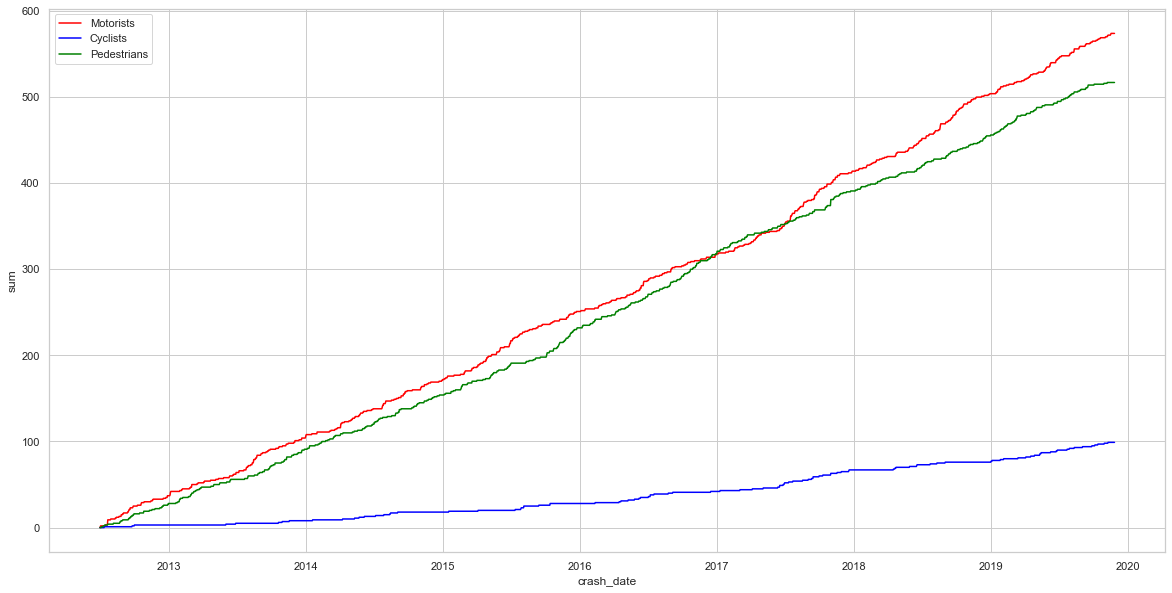

In [145]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='crash_date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

### Fatal crash frequency over time <a id='Fatality_Time_Scatterplot'></a>

To visualize the data we need to refine our dataframe. We'll try to sort rows where fatalities occured into a new dataframe, then we need to group by date and sum.

In [146]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
7,2019-08-11,2019-12-02 22:23:00,NaN,nan,40.858210,-73.91679,0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,station wagon/sport utility vehicle,22,Summer
469,2019-08-02,2019-12-02 10:25:00,queens,11378,40.725918,-73.89535,0.0,1.0,0,1,0,0,0,0,driver inexperience,NaN,dump,NaN,10,Summer
543,2019-08-24,2019-12-02 16:30:00,brooklyn,11236,40.644814,-73.90483,0.0,1.0,0,0,0,0,0,1,driver inexperience,unspecified,motorcycle,pick-up truck,16,Summer
713,2019-08-11,2019-12-02 12:27:00,brooklyn,11230,40.619984,-73.96427,1.0,1.0,0,0,0,1,1,0,driver inexperience,unspecified,sedan,bike,12,Summer
920,2019-08-29,2019-12-02 02:35:00,NaN,nan,40.834890,-73.86630,0.0,1.0,0,1,0,0,0,0,driver inattention/distraction,NaN,dump,NaN,2,Summer


Now to group by `crash_date`... We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting chronologically.

Sidenote: We changed the format in the time column, accidentally adding today's date, but that will not have an impact on our analysis.

In [147]:
clean_nyc1.groupby('crash_date').persons_killed.sum().reset_index().head(20)

,crash_date,persons_killed
0,2012-07-01,0.0
1,2012-07-02,1.0
2,2012-07-03,1.0
3,2012-07-04,0.0
4,2012-07-05,1.0
5,2012-07-06,0.0
6,2012-07-07,0.0
7,2012-07-08,0.0
8,2012-07-09,0.0
9,2012-07-10,1.0


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [148]:
counted_lethal_crashes = clean_nyc1.groupby(['crash_date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69477 entries, 0 to 69476
Data columns (total 4 columns):
crash_date                       69477 non-null datetime64[ns]
borough                          69477 non-null object
contributing_factor_vehicle_1    69477 non-null object
persons_killed                   69477 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.1+ MB


Let's visualize it!

[Text(0, 0.5, 'Killed Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Number of people killed by motorists in NYC')]

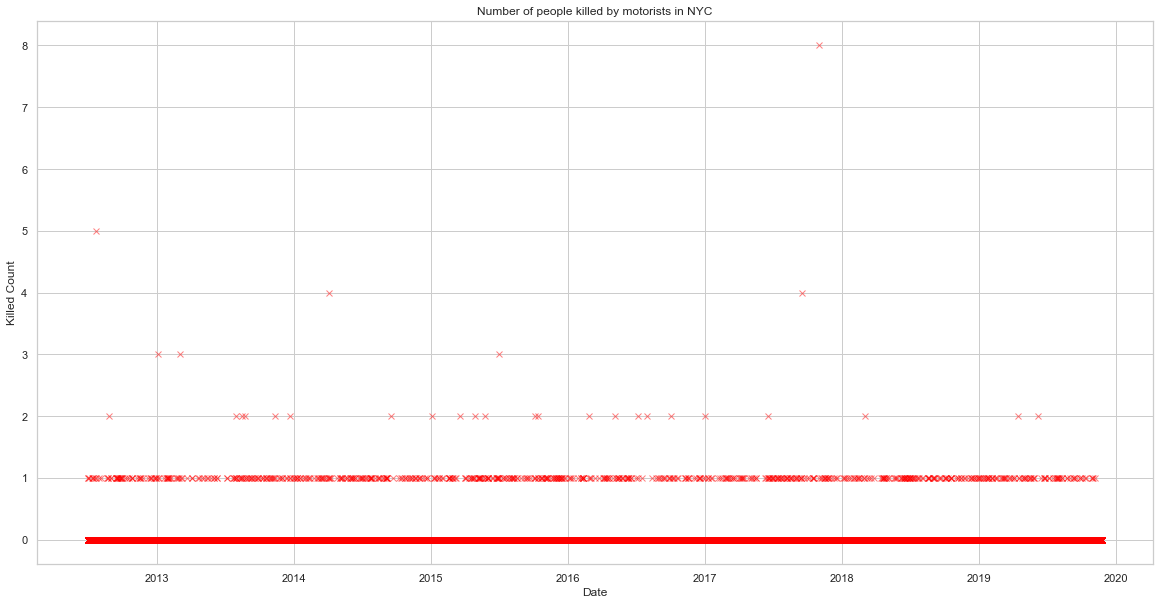

In [149]:
import matplotlib.pyplot as plt
plt.show() #makes graph space appear
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


x = counted_lethal_crashes['crash_date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC") # Set title and labels for axes

We have succesfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Crash factor percentages in Queens <a id='queens_crash_causes'></a>

Let's check out our data

In [150]:
top_boroughs = clean_nyc1['borough'].value_counts()
top_boroughs

brooklyn         191127
queens           183489
manhattan        178725
bronx             85905
staten island     28004
Name: borough, dtype: int64

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.


I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first vehicle involved in the crash. 

In [151]:
borough_factor = clean_nyc1.loc[:, ['borough', 'contributing_factor_vehicle_1']]
queens_data = borough_factor[borough_factor.borough == 'queens']
queens_data.head()

,borough,contributing_factor_vehicle_1
0,queens,driver inexperience
8,queens,driver inexperience
14,queens,road defects
33,queens,driver inexperience
37,queens,car defects


For this data, what are the numbers for each contributing factor. 

In [152]:
reason_counts = queens_data['contributing_factor_vehicle_1'].value_counts()
reason_counts

driver inexperience               80963
driver inattention/distraction    69629
road defects                      12134
illness                            8863
outside error                      5550
drugs (illegal)                    3436
car defects                        2914
Name: contributing_factor_vehicle_1, dtype: int64

Now we will find the percentage contribution of each factor for the burough Queens and the first vehicle involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors. 

In [153]:
total_reason_counts = reason_counts.sum()
total_reason_counts

183489

In [154]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

driver inexperience               44.124171
driver inattention/distraction    37.947234
road defects                       6.612930
illness                            4.830262
outside error                      3.024704
drugs (illegal)                    1.872592
car defects                        1.588106
Name: contributing_factor_vehicle_1, dtype: float64

The greatest impact to crash was 'unspecified'. 'Driver Inattention/Distraction' contributed to about 20% of crashes and 'failure to yield right-of-way' contributed 8%. All remaining factors each contributed 5% or less to crashes. 

Text(0.5, 1.0, 'Percentage of Factors leading to crashes in Queens')

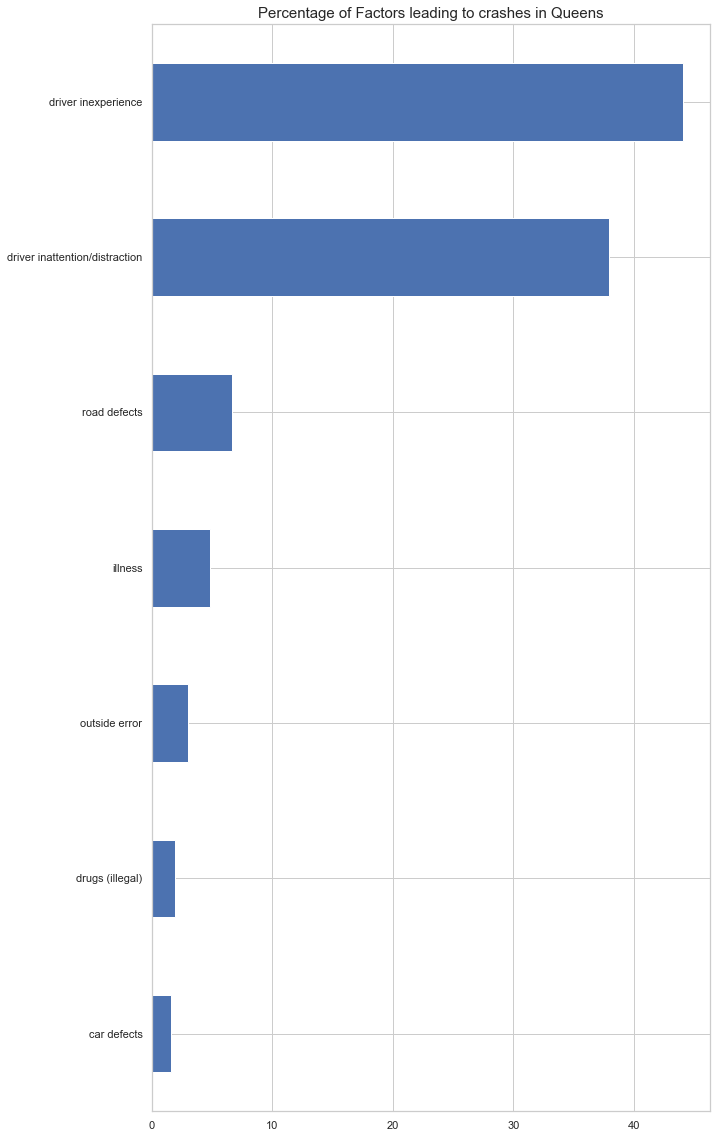

In [155]:
reason_counts1.plot.barh(figsize = (10,20)
                        ).invert_yaxis()
plt.title('Percentage of Factors leading to crashes in Queens', fontsize=15)

# <center> <br>[Begining of the page](#Top)</center> <a id='Bottom'></a>